Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Četvrta laboratorijska vježba: Procjena parametara, probabilistički grafički modeli, grupiranje

*Verzija: 1.0
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **15. siječnja 2023. u 23:59h**

------------------------------

### Upute

Četvrta laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pgmpy as pgm
%pylab inline

def plot_silhouette(n_clusters, X):
    # Kôd preuzet s http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = plt.cm.get_cmap("Dark2")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Vrijednosti koeficijenta siluete")
    ax1.set_ylabel("Oznaka grupe")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = plt.cm.get_cmap("Dark2")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=1,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers # changed to black
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="black", alpha=1, s=100, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=80, edgecolor='k')

    ax2.set_xlabel(r"$x_1$")
    ax2.set_ylabel(r"$x_2$")

    plt.show()

c:\Users\matij\OneDrive\Desktop\FER3\Machine learning 1\LAB\lab4\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Populating the interactive namespace from numpy and matplotlib


### 1. Procjena maksimalne izglednosti

#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [3]:
def L(mu, N, m):
    return mu**m * (1-mu)**(N-m)



#### (b)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

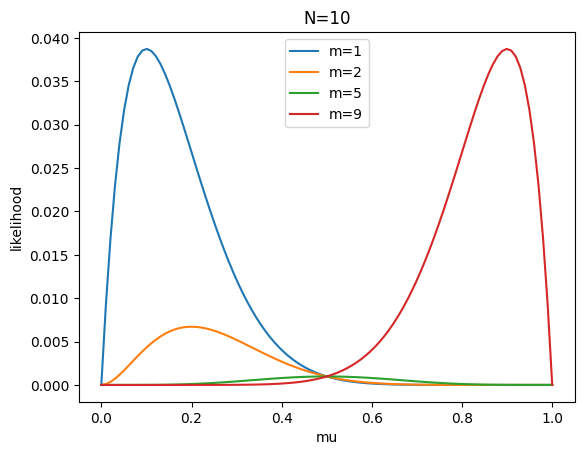

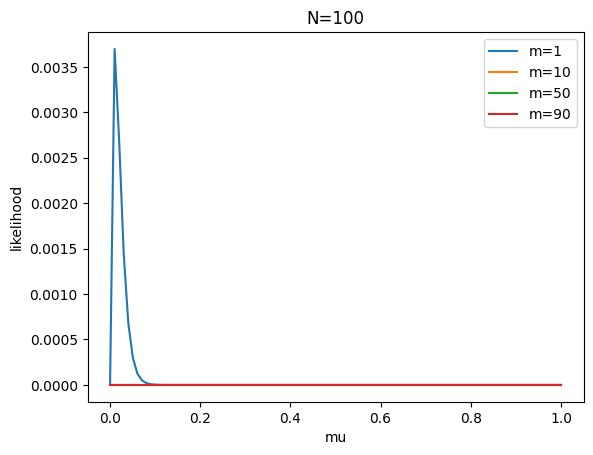

In [4]:
# Vaš kôd ovdje...

# Iscrtaj grafikon za N=10 i m=1,2,5,9
N = 10
ms = [1, 2, 5, 9]
mus = np.linspace(0, 1, 100)
plt.figure()
for m in ms:
    y = L(mus, N, m)
    plt.plot(mus, y, label=f"m={m}")
plt.legend()
plt.xlabel("mu")
plt.ylabel("likelihood")
plt.title("N=10")

# Iscrtaj grafikon za N=100 i m=1,10,50,90
N = 100
ms = [1, 10, 50, 90]
mus = np.linspace(0, 1, 100)

plt.figure()
for m in ms:
    y = L(mus, N, m)
    plt.plot(mus, y, label=f"m={m}")
plt.legend()
plt.xlabel("mu")
plt.ylabel("likelihood")
plt.title("N=100")

plt.show()

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

Text(0.5, 1.0, 'N=10')

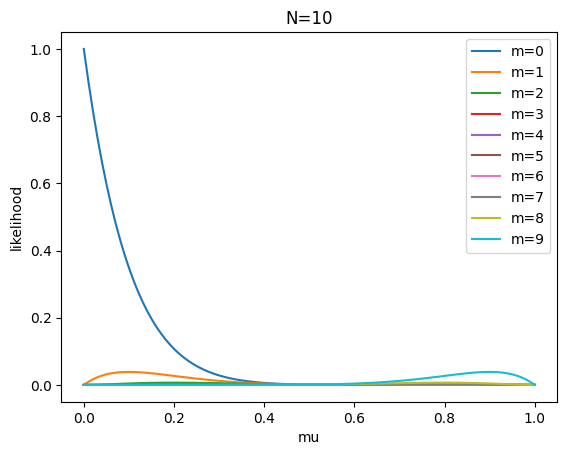

In [5]:
# Vaš kôd ovdje...
# Iscrtaj grafikon za N=10 i m={0,9}
N = 10
ms = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
mus = np.linspace(0, 1, 100)
plt.figure()
for m in ms:
    y = L(mus, N, m)
    plt.plot(mus, y, label=f"m={m}")
plt.legend()
plt.xlabel("mu")
plt.ylabel("likelihood")
plt.title("N=10")

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

### 2. Procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

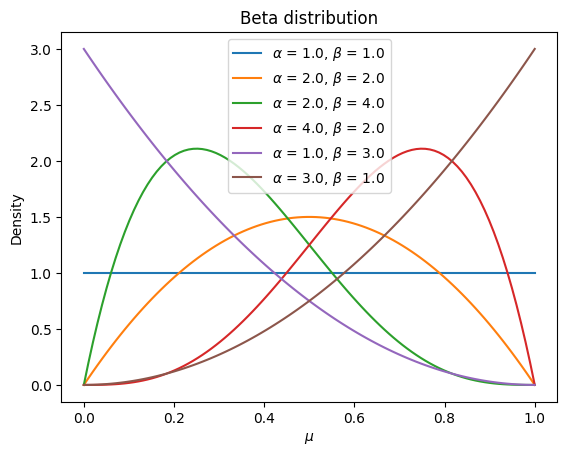

In [6]:
from scipy.stats import beta

# Vaš kôd ovdje...

# Define different combinations of alpha and beta
params = [ (1.0, 1.0), (2.0, 2.0), (2.0, 4.0), (4.0, 2.0), (1.0, 3.0), (3.0, 1.0)]

# Plot the beta distributions
x = np.linspace(0, 1, 100)
for a, b in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('$\mu$')
plt.ylabel('Density')
plt.title('Beta distribution')
plt.legend()
plt.show()

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

#### (b)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

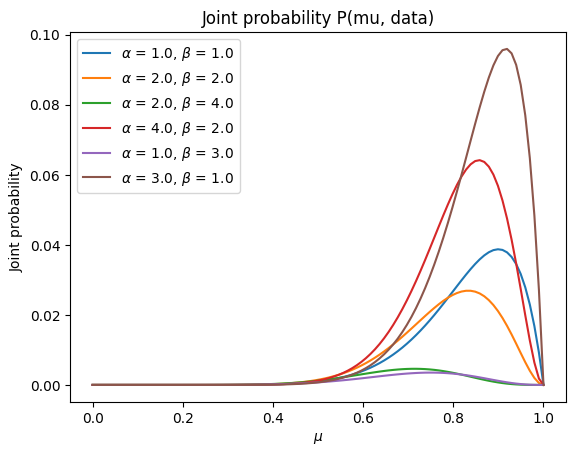

In [7]:
# Vaš kôd ovdje...

N = 10
m = 9

params = [ (1.0, 1.0), (2.0, 2.0), (2.0, 4.0), (4.0, 2.0), (1.0, 3.0), (3.0, 1.0)]

mu = np.linspace(0, 1, 100)
likelihood = L(mu,N,m)
for a, b in params:
    apriori = beta.pdf(mu, a, b)
    
    plt.plot(mu, likelihood * apriori, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('$\mu$')
plt.ylabel('Joint probability')
plt.title('Joint probability P(mu, data)')
plt.legend()
plt.show()


**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

#### (c)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

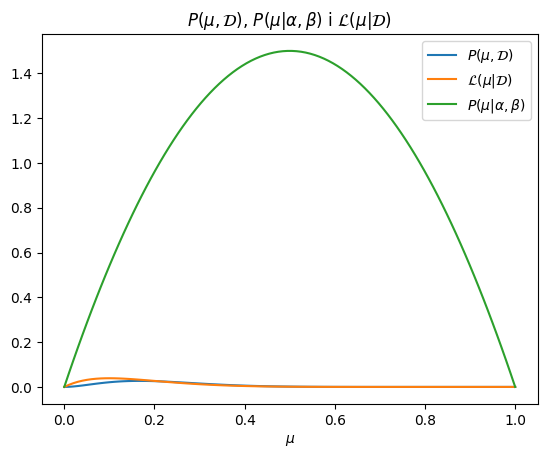

In [8]:
# Vaš kôd ovdje...

N = 10
m = 1

params = [(2.0, 2.0)]

mu = np.linspace(0, 1, 100)
likelihood = L(mu,N,m)
for a, b in params:
    apriori = beta.pdf(mu, a, b)
    plt.plot(mu, likelihood * apriori, label=r"$P(\mu,\mathcal{D})$")
    plt.plot(mu, likelihood , label=r"$\mathcal{L}(\mu|\mathcal{D})$")
    plt.plot(mu, apriori, label=r"$P(\mu|\alpha,\beta)$")

plt.xlabel('$\mu$')
plt.title(r'$P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$')
plt.legend()
plt.show()

### 3. Analiza skupa podataka *Iris*

#### (a)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

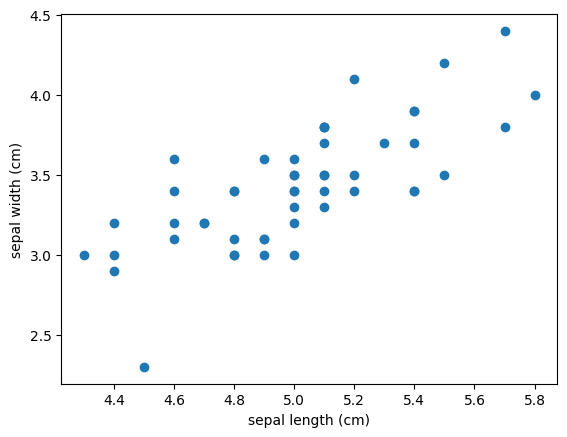

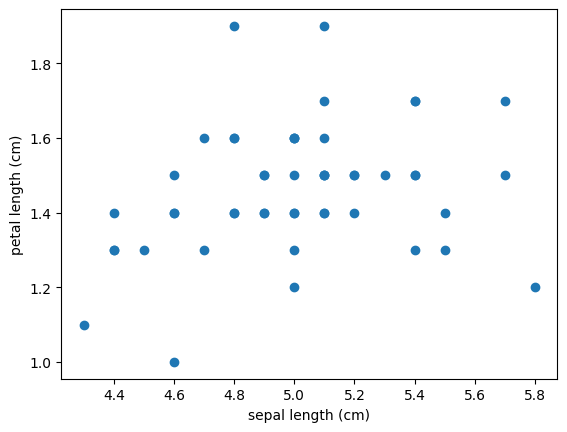

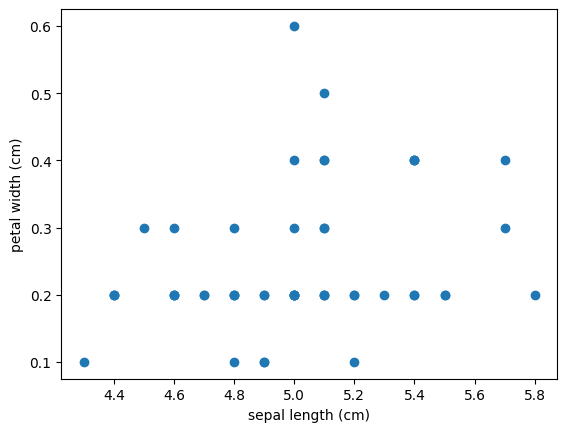

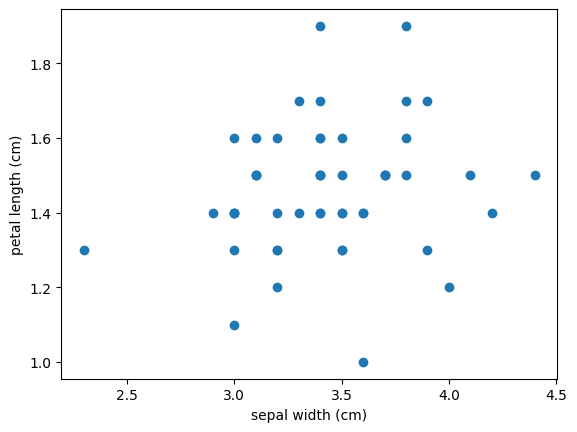

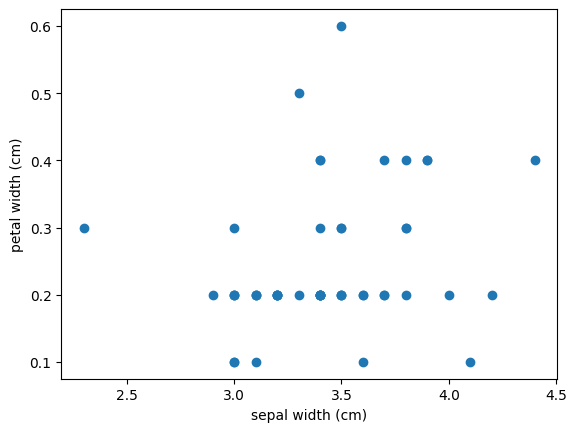

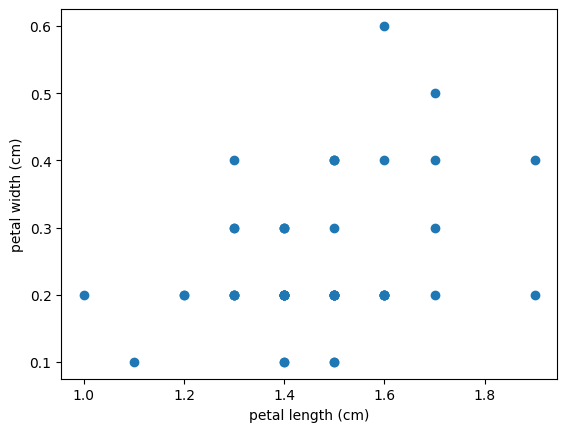

In [9]:
from sklearn.datasets import load_iris
import itertools as it

# Vaš kôd ovdje...

iris = load_iris()

class_idx = 0
X = iris.data[iris.target == class_idx]

# Create 2D scatter plots for each pair of features
for i, j in it.combinations(range(4), 2):
    plt.scatter(X[:, i], X[:, j])
    plt.xlabel(iris.feature_names[i])
    plt.ylabel(iris.feature_names[j])
    plt.show()

#### (b)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [10]:
from scipy.stats import norm

def L_gauss(x, mi, sigma):
    N = len(x)
    y = np.sum((x - mi)**2) / (2 * sigma**2)
    return -N/2*np.log(2*np.pi) - N*np.log(sigma) - y


#### (c)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [11]:
# Vaš kôd ovdje...
X = iris.data
y = iris.target
for i in range(X.shape[1]):
    feature = X[:, i]
    # Iterate over the classes
    for j in range(3):
        class_indices = (y == j)
        class_feature = feature[class_indices]
        mu_ml = np.mean(class_feature)
        var_ml = np.var(class_feature)
        sigma_ml = L_gauss(class_feature, mu_ml, np.sqrt(var_ml))
        print(f"Class {j}, feature {i}:")
        print(f"    mu_ml = {mu_ml}")
        print(f"    var_ml = {var_ml}")
        print(f"    log-likelihood = {sigma_ml}")

Class 0, feature 0:
    mu_ml = 5.006
    var_ml = 0.12176400000000002
    log-likelihood = -18.305163312803867
Class 1, feature 0:
    mu_ml = 5.936
    var_ml = 0.261104
    log-likelihood = -37.37601457039468
Class 2, feature 0:
    mu_ml = 6.587999999999998
    var_ml = 0.3962560000000001
    log-likelihood = -47.80455636149742
Class 0, feature 1:
    mu_ml = 3.428
    var_ml = 0.14081600000000002
    log-likelihood = -21.939396526466613
Class 1, feature 1:
    mu_ml = 2.7700000000000005
    var_ml = 0.09650000000000002
    log-likelihood = -12.49161989430372
Class 2, feature 1:
    mu_ml = 2.974
    var_ml = 0.10192399999999999
    log-likelihood = -13.85873062371893
Class 0, feature 2:
    mu_ml = 1.4620000000000002
    var_ml = 0.029555999999999995
    log-likelihood = 17.089786091159763
Class 1, feature 2:
    mu_ml = 4.26
    var_ml = 0.21640000000000004
    log-likelihood = -32.68125835998838
Class 2, feature 2:
    mu_ml = 5.5520000000000005
    var_ml = 0.29849600000000004


#### (d)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [12]:
from scipy.stats import pearsonr

X = iris.data
y = iris.target
for i in np.unique(y):
    X_class = iris.data[iris.target == i]
    for k, j in it.combinations(range(4), 2):
        pearson = pearsonr(X_class[:, k], X_class[:, j])
        print(f"Class {i+1}, features {k+1},{j+1}. Pearsons coef korelation: {pearson[0]}")
    print()

Class 1, features 1,2. Pearsons coef korelation: 0.7425466856651598
Class 1, features 1,3. Pearsons coef korelation: 0.26717575886875716
Class 1, features 1,4. Pearsons coef korelation: 0.2780983529359697
Class 1, features 2,3. Pearsons coef korelation: 0.17769996678227074
Class 1, features 2,4. Pearsons coef korelation: 0.2327520113628794
Class 1, features 3,4. Pearsons coef korelation: 0.3316300408041188

Class 2, features 1,2. Pearsons coef korelation: 0.5259107172828248
Class 2, features 1,3. Pearsons coef korelation: 0.7540489585920164
Class 2, features 1,4. Pearsons coef korelation: 0.5464610715986298
Class 2, features 2,3. Pearsons coef korelation: 0.5605220916929822
Class 2, features 2,4. Pearsons coef korelation: 0.6639987200241115
Class 2, features 3,4. Pearsons coef korelation: 0.7866680885228169

Class 3, features 1,2. Pearsons coef korelation: 0.45722781639411314
Class 3, features 1,3. Pearsons coef korelation: 0.8642247329355762
Class 3, features 1,4. Pearsons coef korela

#### (e)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [13]:
# Vaš kôd ovdje...

cov_matrix_ml_unbiased = np.cov(X, rowvar=False, bias=False)
print("ML estimate of the covariance matrix (unbiased, N):\n", cov_matrix_ml_unbiased)

cov_matrix_ml_biased = np.cov(X, rowvar=False, bias=True)
print("ML estimate of the covariance matrix (biased, N):\n", cov_matrix_ml_biased)

X_2 = X[:int(150/2),:]
X_4 = X[:int(150/4),:]

cov_matrix_ml_unbiased_2 = np.cov(X_2, rowvar=False, bias=False)
#print("ML estimate of the covariance matrix (unbiased, N/2):\n", cov_matrix_ml_unbiased_2)

cov_matrix_ml_biased_2 = np.cov(X_2, rowvar=False, bias=True)
#print("ML estimate of the covariance matrix (biased, N/2):\n", cov_matrix_ml_biased_2)

cov_matrix_ml_unbiased_4 = np.cov(X_4, rowvar=False, bias=False)
#print("ML estimate of the covariance matrix (unbiased, N/4):\n", cov_matrix_ml_unbiased_4)

cov_matrix_ml_biased_4 = np.cov(X_4, rowvar=False, bias=True)
#print("ML estimate of the covariance matrix (biased, N/4):\n", cov_matrix_ml_biased_4)

print("srednja kvadratna razlika za N primjera:\n", np.sum((cov_matrix_ml_biased - cov_matrix_ml_unbiased)**2))
print("apsolutna razlika za N primjera:\n", np.sum(np.abs(cov_matrix_ml_biased - cov_matrix_ml_unbiased)))

print("srednja kvadratna razlika za N/2 primjera:\n", np.sum((cov_matrix_ml_biased_2 - cov_matrix_ml_unbiased_2)**2))
print("apsolutna razlika za N/2 primjera:\n", np.sum(np.abs(cov_matrix_ml_biased_2 - cov_matrix_ml_unbiased_2)))

print("srednja kvadratna razlika za N/4 primjera:\n", np.sum((cov_matrix_ml_biased_4 - cov_matrix_ml_unbiased_4)**2))
print("apsolutna razlika za N/4 primjera:\n", np.sum(np.abs(cov_matrix_ml_biased_4 - cov_matrix_ml_unbiased_4)))

ML estimate of the covariance matrix (unbiased, N):
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
ML estimate of the covariance matrix (biased, N):
 [[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
srednja kvadratna razlika za N primjera:
 0.0007974934157380622
apsolutna razlika za N primjera:
 0.07821871737509214
srednja kvadratna razlika za N/2 primjera:
 0.0011631227935071562
apsolutna razlika za N/2 primjera:
 0.09893439039038998
srednja kvadratna razlika za N/4 primjera:
 4.10037284601309e-05
apsolutna razlika za N/4 primjera:
 0.015861943024105138


### 4. Probabilistički grafički modeli -- Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [`pgmpy`](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate. Upute se nalaze na gornjoj poveznici. Za korisnike Anaconde, najlakše je upisati `conda install -c ankurankan pgmpy` (ili `pip install pgmpy` ako ne prolazi) unutar Anaconda Prompta (i ponovno pokrenuti Jupyter).

Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (slučajna varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Ova mreža prikazana je na sljedećoj slici:

![This](http://www.fer.unizg.hr/_download/repository/bayes-net-sprinkler.jpg)

Koristeći paket `pgmpy`, konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim, koristeći **egzaktno** zaključivanje, postavite sljedeće posteriorne upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu. Pomoći će vam službena dokumentacija te primjeri korištenja (npr. [ovaj](https://github.com/pgmpy/pgmpy/blob/dev/examples/Monty%20Hall%20Problem.ipynb)).

In [14]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [40]:
# Vaš kôd ovdje...

model = BayesianNetwork([("C", "S"), ("C", "R"), ("R","W"),("S","W")])

cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.5], [0.5]])
cpd_r = TabularCPD(variable='R', variable_card=2, values=[[0.8, 0.2], [0.2, 0.8]], evidence=['C'], evidence_card=[2])
cpd_s = TabularCPD(variable='S', variable_card=2, values=[[0.5, 0.9], [0.5, 0.1]], evidence=['C'], evidence_card=[2])
cpd_w = TabularCPD(variable='W', variable_card=2, values=[[1, 0.1, 0.1, 0.01], [0, 0.9, 0.9, 0.99]], evidence=['S', 'R'], evidence_card=[2, 2])

model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)

model.check_model()

infer = VariableElimination(model)

print(infer.query(['C']))
print(infer.query(['R'], evidence={'W': 1}))
print(infer.query(['S'], evidence={'W': 1}))
print(infer.query(['C'], evidence={'S': 1, 'R': 1}))
print(infer.query(['W']))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2921 |
+------+----------+
| R(1) |   0.7079 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5702 |
+------+----------+
| S(1) |   0.4298 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5556 |
+------+----------+
| C(1) |   0.4444 |
+------+----------+
+------+----------+
| W    |   phi(W) |
+======+==========+
| W(0) |   0.3529 |
+------+----------+
| W(1) |   0.6471 |
+------+----------+


**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže?  
**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi?  
**Q:** Koja je razlika između posteriornog upita i MAP-upita?  
**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?

### 5. Efekt objašnjavanja

 **Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [41]:
# Vaš kôd ovdje...
print("P(r=1|w=1):\n", infer.query(['R'], evidence={'W': 1}))
print("P(r=1|w=1,s=1):\n", infer.query(['R'], evidence={'W': 1, 'S':1}))

#ili obrnuto

print("P(s=1|w=1):\n", infer.query(['S'], evidence={'W': 1}))
print("P(s=1|w=1,r=1):\n", infer.query(['S'], evidence={'W': 1, 'R':1}))

P(r=1|w=1):
 +------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2921 |
+------+----------+
| R(1) |   0.7079 |
+------+----------+
P(r=1|w=1,s=1):
 +------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.6796 |
+------+----------+
| R(1) |   0.3204 |
+------+----------+
P(s=1|w=1):
 +------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5702 |
+------+----------+
| S(1) |   0.4298 |
+------+----------+
P(s=1|w=1,r=1):
 +------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8055 |
+------+----------+
| S(1) |   0.1945 |
+------+----------+


**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

### 6. Algoritam k-sredina

U ovom zadatku ćete se upoznati s algoritmom k-sredina (engl. *k-means*), njegovim glavnim nedostatcima te pretpostavkama.

#### (a)  
Jedan od nedostataka algoritma k-sredina jest taj što unaprijed zahtjeva broj grupa ($K$) u koje će grupirati podatke. Ta informacija nam često nije dostupna (kao što nam nisu dostupne ni oznake primjera) te je stoga potrebno nekako izabrati najbolju vrijednost hiperparametra $K$. Jedan od naivnijih pristupa jest **metoda lakta/koljena** (engl. *elbow method*) koju ćete isprobati u ovom zadatku.

U svojim rješenjima koristite ugrađenu implementaciju algoritma k-sredina, dostupnoj u razredu [`cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

**NB**: Kriterijska funkcija algoritma k-sredina još se i naziva **inercijom** (engl. *inertia*). Za naučeni model, vrijednost kriterijske funkcije $J$ dostupna je kroz razredni atribut `inertia_`.

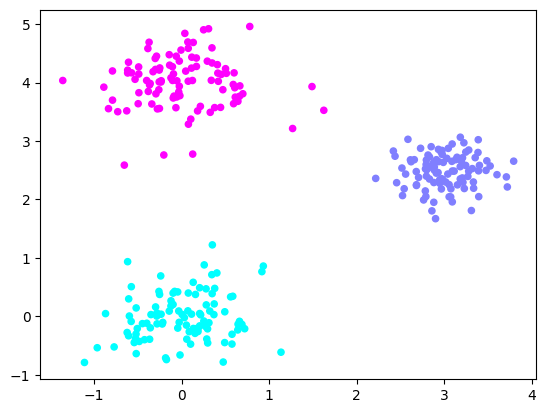

In [17]:
from sklearn.datasets import make_blobs

Xp, yp = make_blobs(n_samples=300, n_features=2, centers=[[0, 0], [3, 2.5], [0, 4]], 
                    cluster_std=[0.45, 0.3, 0.45], random_state=96)
plt.scatter(Xp[:,0], Xp[:,1], c=yp, cmap=plt.get_cmap("cool"), s=20)

Iskoristite skup podataka `Xp` dan gore. Isprobajte vrijednosti hiperparametra $K$ iz $[0,1,\ldots,15]$. Ne trebate dirati nikakve hiperparametre modela osim $K$. Iscrtajte krivulju od $J$ u ovisnosti o broju grupa $K$. Metodom lakta/koljena odredite vrijednost hiperparametra $K$.

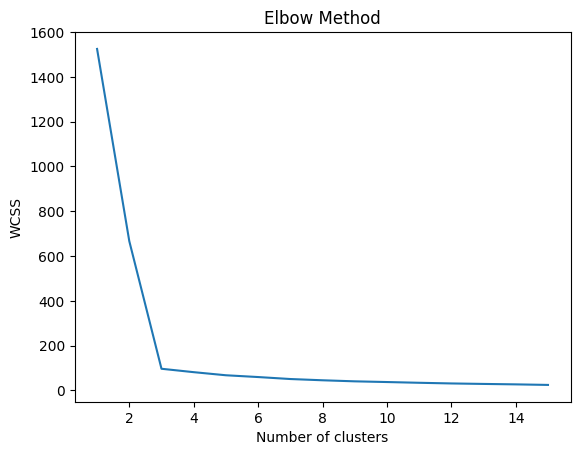

In [18]:
from sklearn.cluster import KMeans

# Vaš kôd ovdje...

wcss = []

# Fit the k-means algorithm for K values from 0 to 15
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Xp)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against K values
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Q:** Koju biste vrijednost hiperparametra $K$ izabrali na temelju ovog grafa? Zašto? Je li taj odabir optimalan? Kako to znate?    
**Q:** Je li ova metoda robusna?  
**Q:** Možemo li izabrati onaj $K$ koji minimizira pogrešku $J$? Objasnite.

#### (b)  
Odabir vrijednosti hiperparametra $K$ može se obaviti na mnoštvo načina. Pored metode lakta/koljena, moguće je isto ostvariti i analizom siluete (engl. *silhouette analysis*). Za to smo pripremili funkciju `plot_silhouette` koja za dani broj grupa i podatke iscrtava prosječnu vrijednost koeficijenta siluete i vrijednost koeficijenta svakog primjera (kroz grupe). 

Vaš je zadatak isprobati različite vrijednosti hiperparametra $K$, $K \in \{2, 3, 5\}$ i na temelju dobivenih grafova odlučiti se za optimalan $K$.

For n_clusters = 2 The average silhouette_score is : 0.59280796169837


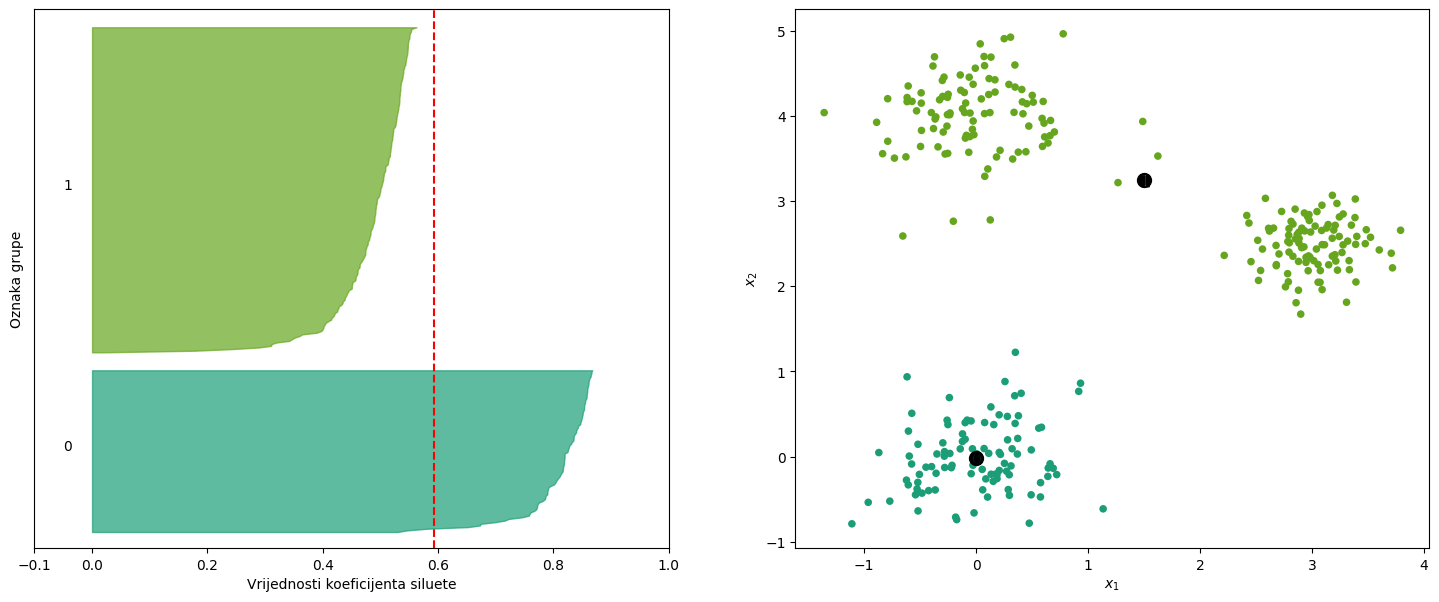

For n_clusters = 3 The average silhouette_score is : 0.7975462212061406


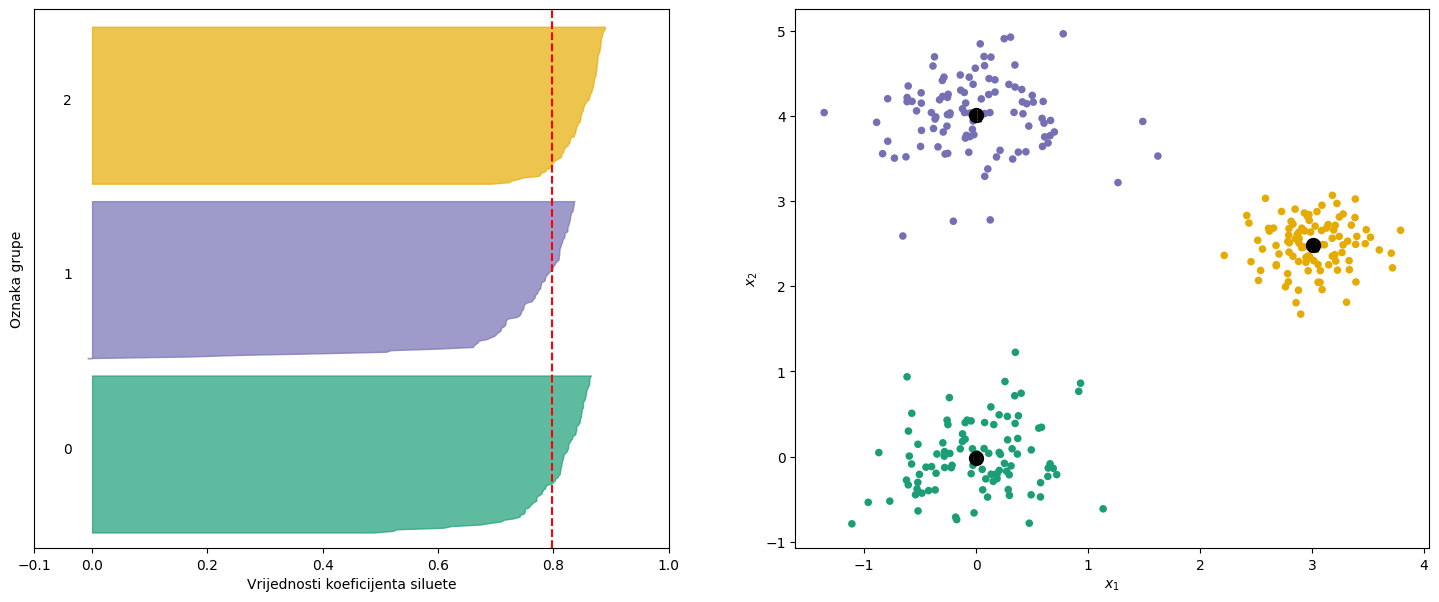

For n_clusters = 5 The average silhouette_score is : 0.5052371766008248


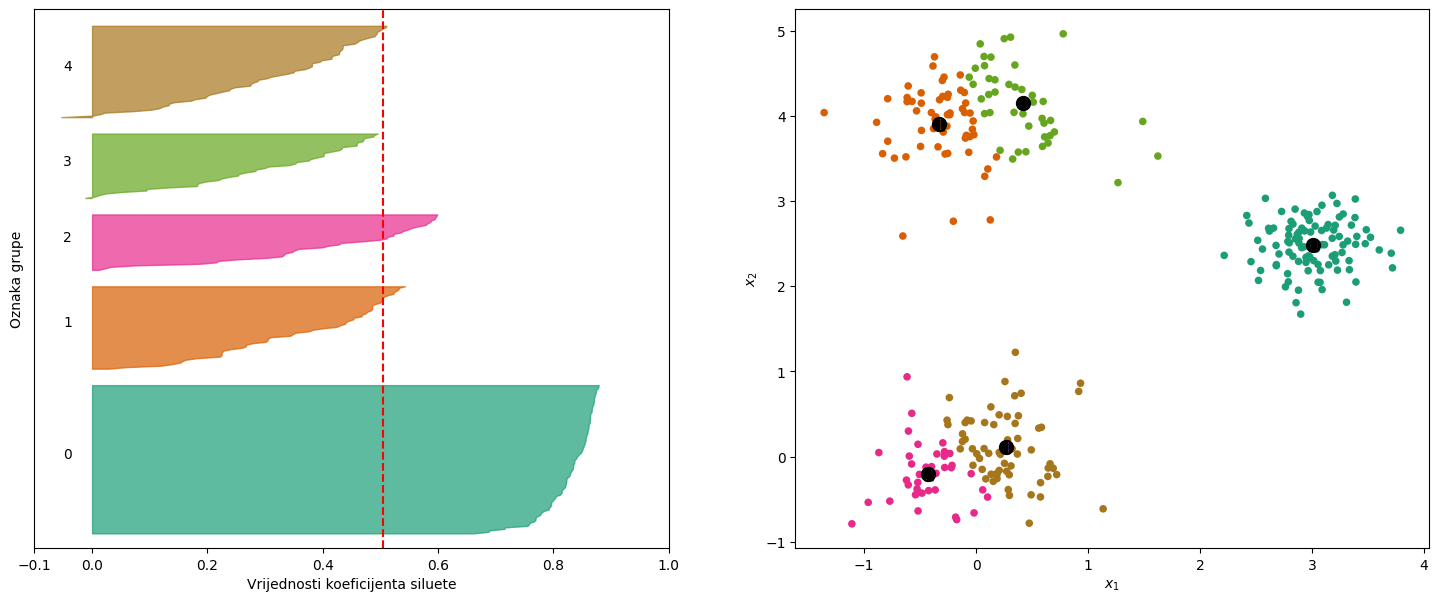

In [19]:
# Vaš kôd ovdje...
ks = [2,3,5]

for k in ks:
    plot_silhouette(n_clusters=k,X=Xp)

**Q:** Kako biste se gledajući ove slike odlučili za $K$?  
**Q:** Koji su problemi ovog pristupa?

#### (c)  
U ovom i sljedećim podzadatcima fokusirat ćemo se na temeljne pretpostavke algoritma k-sredina te što se događa ako te pretpostavke nisu zadovoljene. 

Prvo, krenite od podataka `X1`, koji su generirani korištenjem funkcije [`datasets.make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), koja stvara grupe podataka pomoću izotropskih Gaussovih distribucija.

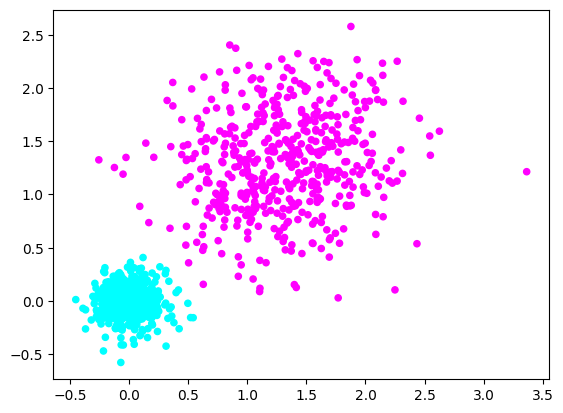

In [20]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0], [1.3, 1.3]], cluster_std=[0.15, 0.5], random_state=96)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.get_cmap("cool"), s=20)

Naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

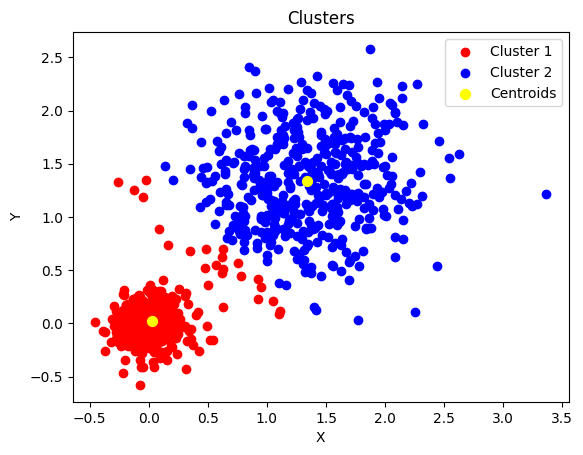

In [21]:
# Vaš kôd ovdje...

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X1)

# Visualize the clustering
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (d)

Isprobajte algoritam k-sredina na podatcima generiranim korištenjem funkcije [`datasets.make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), koja stvara dvije grupe podataka tako da je jedna unutar druge.

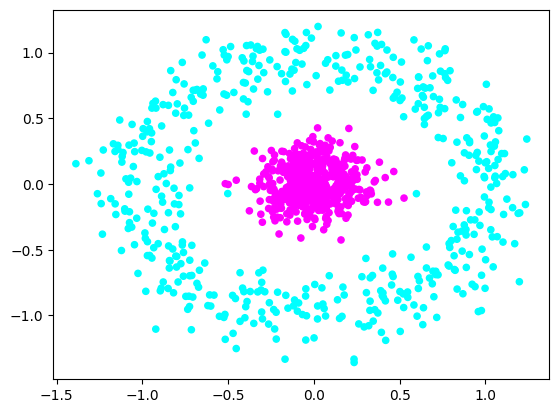

In [22]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=1000, noise=0.15, factor=0.05, random_state=96)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.get_cmap("cool"), s=20)

Ponovno, naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

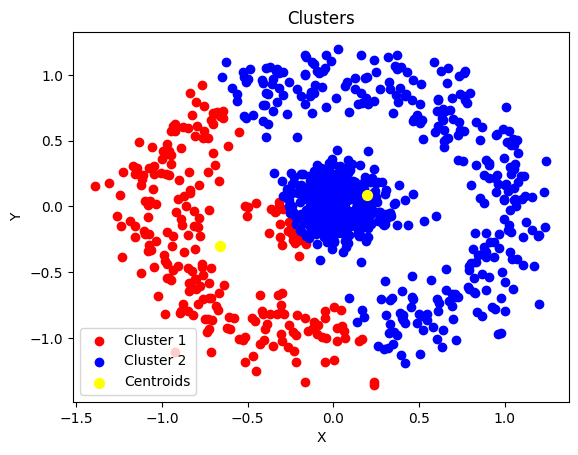

In [23]:
# Vaš kôd ovdje...

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X2)

# Visualize the clustering
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (e)  
Završno, isprobat ćemo algoritam na sljedećem umjetno stvorenom skupu podataka:

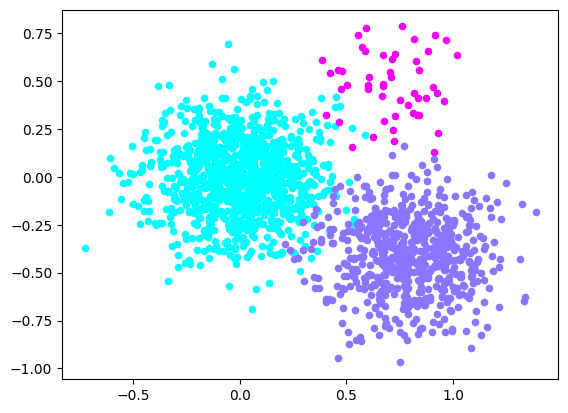

In [24]:
X31, y31 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0]], cluster_std=[0.2], random_state=69)
X32, y32 = make_blobs(n_samples=50, n_features=2, centers=[[0.7, 0.5]], cluster_std=[0.15], random_state=69)
X33, y33 = make_blobs(n_samples=600, n_features=2, centers=[[0.8, -0.4]], cluster_std=[0.2], random_state=69)
plt.scatter(X31[:,0], X31[:,1], c="#00FFFF", s=20)
plt.scatter(X32[:,0], X32[:,1], c="#F400F4", s=20)
plt.scatter(X33[:,0], X33[:,1], c="#8975FF", s=20)

# Just join all the groups in a single X.
X3 = np.vstack([X31, X32, X33])
y3 = np.hstack([y31, y32, y33])

Ponovno, naučite model k-sredina (ovaj put idealno pretpostavljajući $K=3$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

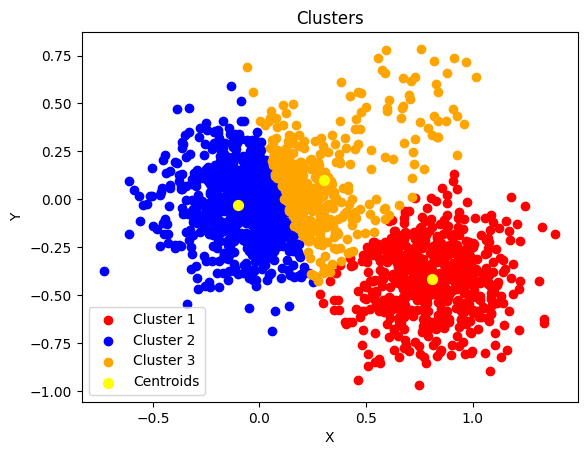

In [25]:
# Vaš kôd ovdje...

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X3)

# Visualize the clustering
plt.scatter(X3[y_kmeans == 0, 0], X3[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X3[y_kmeans == 1, 0], X3[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X3[y_kmeans == 2, 0], X3[y_kmeans == 2, 1], c = 'orange', label = 'Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

### 7. Model Gaussovih mješavina

Sada kada ste se upoznali s ograničenjima algoritma k-sredina, isprobat ćete grupiranje modelom mješavine Gaussa (*Gaussian Mixture Models; GMM*), koji je generalizacija algoritma k-sredina (odnosno, algoritam k-sredina specijalizacija je GMM-a). Implementacija ovog modela dostupna je u [`mixture.GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Isprobajte ovaj model (s istim pretpostavkama o broju grupa) na podacima iz podzadataka (c)-(e). Ne morate mijenjati nikakve hiperparametre ni postavke osim broja komponenti.

In [26]:
from sklearn.mixture import GaussianMixture

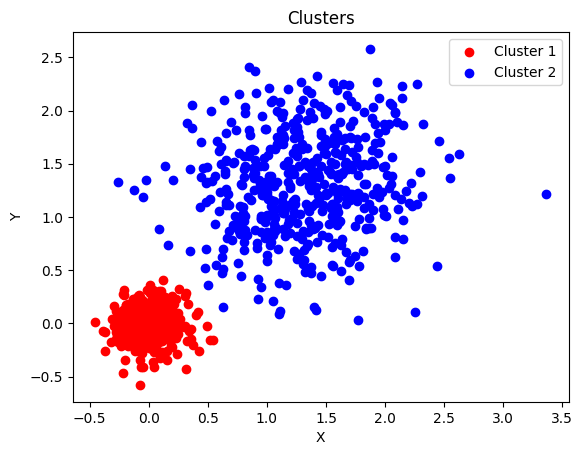

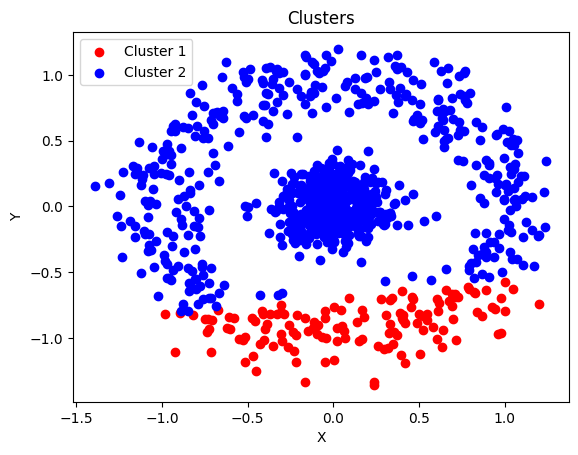

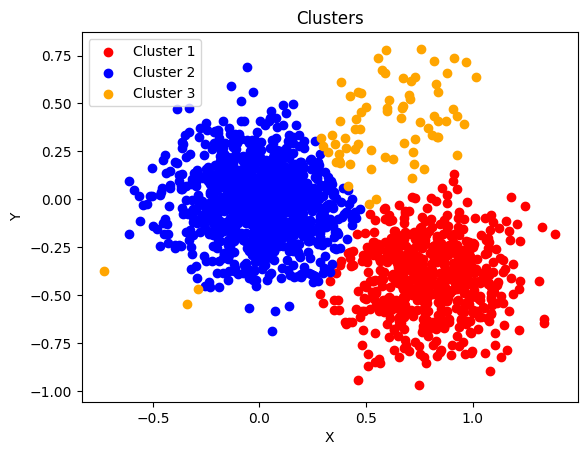

In [27]:
# Vaš kôd ovdje...

gmm = GaussianMixture(n_components=2)
gmm.fit(X1)
y_gmm = gmm.predict(X1)

# Visualize the clustering
plt.scatter(X1[y_gmm == 0, 0], X1[y_gmm == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_gmm == 1, 0], X1[y_gmm == 1, 1], c = 'blue', label = 'Cluster 2')

plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

######################

gmm = GaussianMixture(n_components=2)
gmm.fit(X2)
y_gmm = gmm.predict(X2)

# Visualize the clustering
plt.scatter(X2[y_gmm == 0, 0], X2[y_gmm == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_gmm == 1, 0], X2[y_gmm == 1, 1], c = 'blue', label = 'Cluster 2')

plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#######################

gmm = GaussianMixture(n_components=3)
gmm.fit(X3)
y_gmm = gmm.predict(X3)

# Visualize the clustering
plt.scatter(X3[y_gmm == 0, 0], X3[y_gmm == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X3[y_gmm == 1, 0], X3[y_gmm == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X3[y_gmm == 2, 0], X3[y_gmm == 2, 1], c = 'orange', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### 8. Vrednovanje grupiranja

Kako vrednovati točnost modela grupiranja ako imamo stvarne oznake svih primjera (a u našem slučaju imamo, jer smo mi ti koji smo generirali podatke)? Često korištena mjera jest **Randov indeks** koji je zapravo pandan točnosti u zadatcima klasifikacije. Implementirajte funkciju `rand_index_score(y_gold, y_predict)` koja ga računa. Funkcija prima dva argumenta: listu stvarnih grupa kojima primjeri pripadaju (`y_gold`) i listu predviđenih grupa (`y_predict`). Dobro će vam doći funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

In [31]:
import itertools as it
from sklearn.metrics import rand_score

def rand_index_score(y_gold, y_predict):
    n = len(y_gold)
    a, b, c, d = 0, 0, 0, 0
    for (i, j) in it.combinations(range(n), 2):
        if y_gold[i] == y_gold[j] and y_predict[i] == y_predict[j]:
            a += 1
        elif y_gold[i] != y_gold[j] and y_predict[i] != y_predict[j]:
            b += 1
        elif y_gold[i] == y_gold[j] and y_predict[i] != y_predict[j]:
            c += 1
        elif y_gold[i] != y_gold[j] and y_predict[i] == y_predict[j]:
            d += 1
    return (a + b) / (a + b + c + d)

0.6666666666666666
0.6666666666666666


**Q:** Zašto je Randov indeks pandan točnosti u klasifikacijskim problemima?  
**Q:** Koji su glavni problemi ove metrike?   
**Q:** Kako vrednovati kvalitetu grupiranja ako nenamo stvarne oznake primjera? Je li to uopće moguće?